In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instacart-dataset-raw/products.csv
/kaggle/input/instacart-dataset-raw/instacart_orders.csv
/kaggle/input/instacart-dataset-raw/order_products.csv
/kaggle/input/instacart-dataset-raw/aisles.csv
/kaggle/input/instacart-dataset-raw/departments.csv


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/kaggle/input/instacart-dataset-raw/instacart_orders.csv', sep = ';')
products = pd.read_csv('/kaggle/input/instacart-dataset-raw/products.csv', sep = ';')
order_products = pd.read_csv('/kaggle/input/instacart-dataset-raw/order_products.csv', sep = ';')
aisles = pd.read_csv('/kaggle/input/instacart-dataset-raw/aisles.csv', sep = ';')
departments = pd.read_csv('/kaggle/input/instacart-dataset-raw/departments.csv', sep = ';')

In [4]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# mostrar información del DataFrame
order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [7]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En cuanto a la calidad de los datos, en general considero que están en un buen estado, solo los primeros 3 dataframes tienen valores ausentes en una columna, los tipos de datos de cada columna en los DataFrames es el correcto. A simple vista los datos se ven bien, faltaría analizar duplicados y tratar esos valores ausentes.

Hablando más hacerca de algunas observaciones y características, me percaté de que ninguno de los datasets contiene información relacionada a precios o ventas, es decir toda la información corresponde a conductas y comportamientos de los clientes, así como de características de los productos que **InstaCart** comercializa.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Primero vamos a procesar valores duplicados y a analizarlos, después valores ausentes, debido a que los tipos de datos son correctos no los modificaré

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print('Número de filas duplicadas: ', orders.duplicated().sum())
print()
print(orders[orders.duplicated()])

Número de filas duplicadas:  15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_at_2 = orders.query('order_dow == 3 and order_hour_of_day == 2')

In [11]:
#Calculamos el porcentaje de valores duplicados de las ordenes totales del miércoles a las 2 de la mañana.
((orders.duplicated().sum())/len(wed_at_2))*100

12.396694214876034

¿Qué sugiere este resultado?

Todos las filas duplicadas de este DataFrame se generaron el miércoles a las 2 de la mañana, de el total de pedidos del miércoles a las 2 de la mañana el 12.39% son duplicados.

In [12]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop = True)

In [13]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Encontramos que los valores duplicados estaban todos relacionados con ordenes del miércoles a las 2 de la mañana, por alguna razón. Eliminamos estos valores duplicados y verificamos el resultado.

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
print('Número de filas duplicadas: ', products.duplicated().sum())

Número de filas duplicadas:  0


In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()
#Si hay valores duplicados en esta columna, sin embargo esto es debido a que varios productos pertenecen al mismo departament
#por tanto no implica un problema.

49673

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
products['product_name'].duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
notna_products = products[products['product_name'].notna()]
notna_products['product_name'].duplicated().sum()

104

In [19]:
na_products = products[products['product_name'].isna()]
print(na_products['department_id'].unique())
print(na_products['aisle_id'].unique())

[21]
[100]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame como tal no tiene filas enteras duplicadas, sin embargo la columna product_name tiene 1361 valores duplicados de los cuáles 104 son verdaderos duplicados, mientras que los demás son valores ausentes y por eso pandas los marca como duplicados. Aún no he realizado nada con esto debido a que más adelante trataremos los valores ausentes.

Algo que considero importante mencionar es que todos los valores ausentes en la columna product_name tienen el mismo aisle_id y el mismo department_id, 100 y 21 respectivamente. Creo que esto puede ser un indicativo de que hay un problema en el registro de los nombres los productos de esa zona.

Otro punto importante es que al ser 104 los valores duplicados de la columna product_name y estos no son NaN, puede deberse a que el producto viene en distintas presentaciones, esto explicaría que los valores de las demás columnas no estén duplicados.

### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()


0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados, ni valores ausentes, este DataFrame esta listo.

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [23]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados, ni valores ausentes, este DataFrame esta listo.

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()


0

In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products['order_id'].duplicated().sum()

4094961

In [26]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame no tiene filas enteras duplicadas, sin embargo la columna order_id tiene más de 4 millones de valores duplicados, a simple vista esto podría parecer un error, sin embargo si observamos con más detalle las columnas nos damos cuenta de que cada fila solo representa a un producto ordenado, hubo ordenes de más de un producto y es por esto que hay valores duplicados en la columna order_id.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
# Encuentra los valores ausentes en la columna 'product_name'
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.

In [28]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


Describe brevemente cuáles son tus hallazgos.

In [29]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


Describe brevemente cuáles son tus hallazgos.

Como lo habíamos mencionado y verificado previamente, los valores ausentes están relacionados todos con el aisle número 100 y el departamento 21.

In [30]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments.iloc[20])
print()
print(aisles.iloc[99])

department_id         21
department       missing
Name: 20, dtype: object

aisle_id        100
aisle       missing
Name: 99, dtype: object


In [31]:
dep_21 = products.query('department_id == 21 and aisle_id == 100')
dep_21['product_name'].unique()

array([nan], dtype=object)

Describe brevemente cuáles son tus hallazgos.

Es curioso ya que todas las filas que contienen el aisle 100 contienen también el departamento 21, ambos son 'missing' y todas las filas que contienen esto, su valor en la columna product_name es NaN, esto implica que casi no tenemos información sobre estos productos, solo su id de producto.

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace = True)
products.isna().sum()

/tmp/ipykernel_31/1835005277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace = True)


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Rellene los valores ausentes con el nombre Unknown ya que no lo sabemos, de todos los productos del aisle 100 no conocemos el nombre, no podemos eliminar estas filas porque perderíamos estos productos que representan algo, solo que no sabemos qué. Si esto fuera la vida real, preguntaría al encargado o a la tienda para averiguar cuáles son estos productos, pero por ahora no podemos hacer nada más.

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [34]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[orders['days_since_prior_order'].isna()]['order_number'].unique()

array([1])

In [35]:
#A continuación vamos a rellenar los valores ausentes con 0 ya que no existió una orden previa.
orders.fillna(0, inplace = True)
#Verificamos el número de valores ausentes.
orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los valores ausentes en la columna "days_since_prior_order" corresponden a la primera orden del cliente, lo que hace sentido que el valor sea nulo ya que no hubo una orden anterior a esa, dado esto rellené los valores nulos con 0

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Los valores mínimo y máximo son 1 y 64 respectivamente, parece ser que los valores ausentes pertenecen a un grupo de datos específico, esto lo revisaré más adelante.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
null_order = order_products[order_products['add_to_cart_order'].isna()]
add_to_cart_order = null_order['order_id']


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_groups = null_order.groupby('order_id')['product_id'].count()
print(order_groups)
print()
print('Valor mínimo: ', order_groups.min())
print('Valor máximo: ', order_groups.max())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

Valor mínimo:  1
Valor máximo:  63


Describe brevemente cuáles son tus hallazgos.

La respuesta a la pregunta antes planteada es no, las ordenes que tienen valores ausentes tienen un número de productos en un rango de 1 a 63.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products.fillna(999, inplace = True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info(show_counts=True)
#muestro la información del DF, se puede ver que ya no hay valores ausentes, y la columna add_to_cart_order ya es de tipo entero.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para tratar los valores ausentes del DataFrame, los rellenamos con 999 y posteriormente convertimos esa columna de tipo de datos float64 a tipo de datos int64.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En este paso nos encontramos con que tres de los DataFrames tenían problemas de calidad, para garantizar el correcto análisis tuvimos que tratar estos problemas, en general solo presentaban valores duplicados y ausentes. Cabe resaltar que en la mayoría de casos de tanto valores duplicados como valores ausentes, estos tenían una razón de ser, o estaban relacionados con otras columnas, mostraban patrones lo que indica que no son errores accidentales.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
#Vamos a verificar si los datos de la columna order_hour_of_day están entre 0 y 23.
print('Valor mínimos: ', orders['order_hour_of_day'].min())
print('Valr máximo: ', orders['order_hour_of_day'].max())

Valor mínimos:  0
Valr máximo:  23


In [42]:
#Vamos a confirmar que los valores de la columna order_dow estén entre 0 y 6.
print('Valor mínimos: ', orders['order_dow'].min())
print('Valr máximo: ', orders['order_dow'].max())

Valor mínimos:  0
Valr máximo:  6


Escribe aquí tus conclusiones

Los rangos de valores de las columnas de hora del día y día de la semana están correctos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [43]:
order_hour_of_day = orders.groupby('order_hour_of_day')['user_id'].count()
order_hour_of_day

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64

Escribe aquí tus conclusiones

Como se puede observar en la serie, la hora en la que más pedidos se hacen es a las 10:00, se hacen alrededor de 40,000 ordenes, después disminuye y vuelve a subir, para finalmente comenzar un declive en cuanto al número de ordenes. Notese que en la madrugada de las 23:00 hasta las 6 de la mañana el número de ordenes es considerablemente menor, eso tiene sentido ya que a esa hora las personas generalmente no hacen el super.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [44]:
order_dow = orders.groupby('order_dow')['user_id'].count()
order_dow

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64

Escribe aquí tus conclusiones

El domingo y el lúnes son los días de la semana en los cuáles se realizan más ordenes, los demás días de la semana son similares en cuanto a la cantidad de ordenes, esta cantidad disminuye un poco entre semana y a partir del viernes comienza a aumentar hasta llegar al lúnes, el martes disminuye significativamente.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [45]:
days_since_prior_order = orders.groupby('days_since_prior_order')['user_id'].count()
print(days_since_prior_order)
print()
print('Menor número de ordenes: ', days_since_prior_order.min())
print('Mayor número de ordenes: ', days_since_prior_order.max())


days_since_prior_order
0.0     38406
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: user_id, dtype: int64

Menor número de ordenes:  2640
Mayor número de ordenes:  51337


Escribe aquí tus conclusiones

Para dar respuesta a la pregunta agrupamos por la columna days_since_prior_order y después contamos el número de ordenes. La tabla presenta 3 picos, el día 0, el día 7 y el día 30, me parece muy interesante y lógico que las personas vuelvan muy pronto, algunas personas hacen el super cada semana lo que hace sentido con el día 7 y otras personas lo hacen una ves al mes, lo que también tiene sentido. En los intervalos de tiempo de otros días las personas hacen menos pedidos, de el transcurso de 1 a 7 días la cantidad de pedidos es considerable, después disminuye y tiene un pequeño aumento en los 14 días, es decir a las dos semanas.
En cuanto al valor mínimo de ordenes es 2640 y el máximo es de 51337, este valor máximo lo alcanza a los 30 días de la compra. El valor mínimo lo alcanza a los 29 días. Es impresionante como sube drasticamente del día 29 al 30 el número de ordenes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<function matplotlib.pyplot.show(close=None, block=None)>

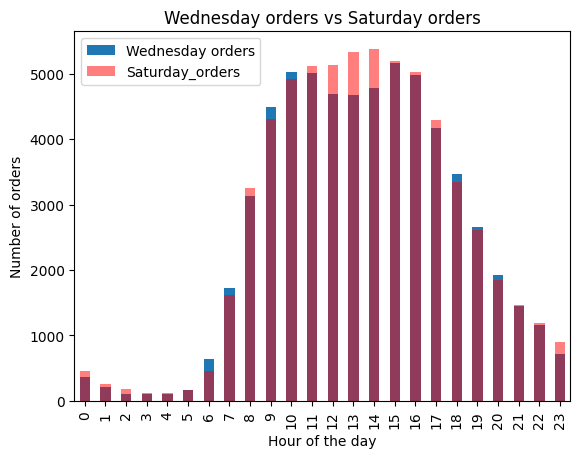

In [46]:
wed_orders = orders.query('order_dow == 3').groupby('order_hour_of_day')['user_id'].count()
sat_orders = orders.query('order_dow == 6').groupby('order_hour_of_day')['user_id'].count()
wed_orders.plot(kind='bar', 
                title = 'Wednesday orders vs Saturday orders', 
                xlabel = 'Hour of the day',
                ylabel = 'Number of orders')
sat_orders.plot(kind='bar', xlabel = 'Hour of the day', color = 'red', alpha = 0.5)
plt.legend(['Wednesday orders', 'Saturday_orders'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

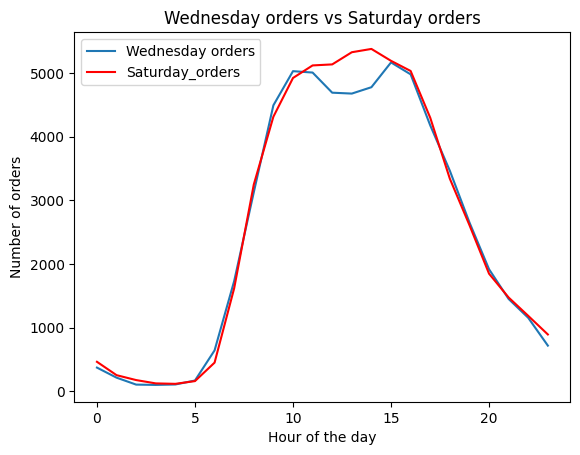

In [47]:
wed_orders.plot(title = 'Wednesday orders vs Saturday orders', 
                xlabel = 'Hour of the day',
                ylabel = 'Number of orders')
sat_orders.plot(xlabel = 'Hour of the day', color = 'red')
plt.legend(['Wednesday orders', 'Saturday_orders'])
plt.show

Escribe aquí tus conclusiones

Decidí mostrar también un grafico de lineas para poder visualizar el comportamiento de una manera más clara. El gráfico muestra para cada día, el número de ordenes por hora, es visible como el día miercoles una vez llegado el pico comienza un pequeño declive y después se vuelve a levantar, de las 10 a las 15 horas. Por otro lado el día sabado la grafica muestra que no hay declive, aumenta casi constantemente hasta alcanzar el pico más alto y posteriormente iniciar su declive, algo importante de mencionar esque para el día sabado, el pico de ordenes se genera en el intervalo de tiempo que para el día miércoles es el declive, de 10:00 a 15:00.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<function matplotlib.pyplot.show(close=None, block=None)>

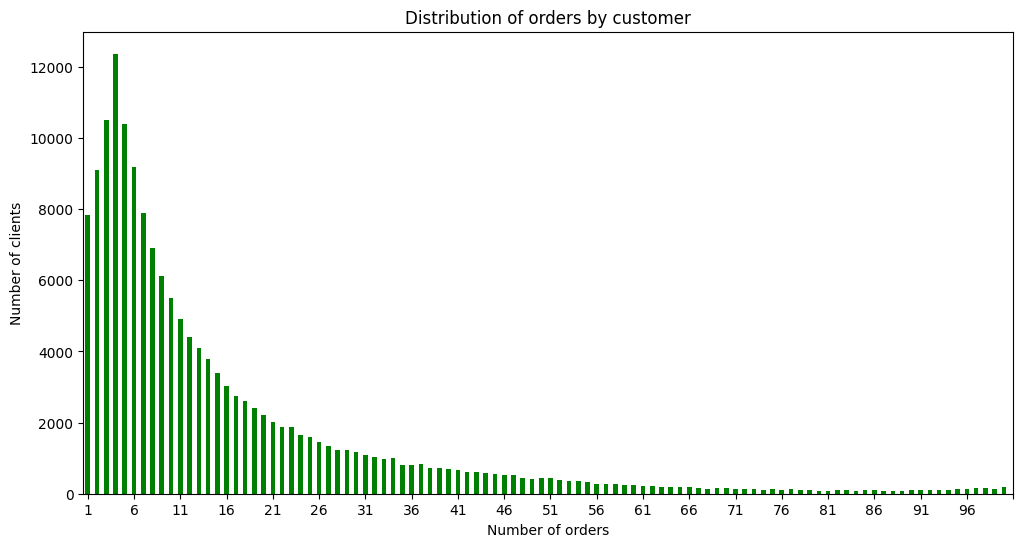

In [48]:
orders_per_client = orders.groupby('user_id')['order_number'].max()


distribution = orders_per_client.value_counts().sort_index()

distribution.plot(kind='bar', figsize=(12, 6), rot = 360, color = 'green')
plt.title('Distribution of orders by customer')
plt.xlabel('Number of orders')
plt.ylabel('Number of clients')
plt.xticks(ticks=range(0, max(distribution.index)+1, 5))
plt.show

Escribe aquí tus conclusiones

En el gráfico podemos ver claramente como los pedidos con pocas ordenes predominan, la mayoría de personas hacen ordenes pocas ordenes, el pico de la gráfica muestra que al rededor de 12,000 clientes hacen compras de 4 ordenes. Mientrás la cantidad de ordenes aumenta, el número de clientes disminuye constantemente, a partir de las 94 ordenes aproximadamente, comienza un ligero ascenso en el número de clientes. Esto hace sentido ya que instacart tiene un modelo de negocio B2C(Business to costumer) lo que implica que la mayoría de los clientes compran en pequeñas cantidades.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [83]:
product_count = order_products['product_id'].value_counts()
top_20_products = product_count.sort_values(ascending = False).head(20)
top_20_products_df = top_20_products.reset_index()
top_20_products_df.columns = ['product_id', 'number_of_times_purchased']
top_20_products_merged = pd.merge(top_20_products_df, products[['product_id', 'product_name']], on='product_id', how='left')
top_20_products_merged

,product_id,number_of_times_purchased,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


Escribe aquí tus conclusiones
Anteriormente mostramos los 20 productos más populares con su id de producto y el número de veces que se compro este producto, como podemos ver los platanos son el producto más popular, seguido por la bolsa orgánica de platanos y las fresas organicas. E. número de veces que se compro el producto "Banana" fue 66050 lo cual es una gran cantidad. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<function matplotlib.pyplot.show(close=None, block=None)>

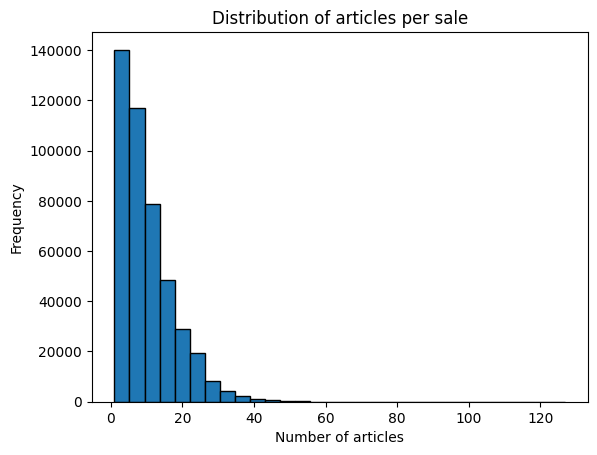

In [53]:
articles_per_order = order_products.groupby('order_id')['product_id'].count()
articles_per_order.plot(kind='hist', 
                        title = 'Distribution of articles per sale',
                        xlabel = 'Number of articles',
                        edgecolor = 'black',
                        bins = 30)
plt.show

Escribe aquí tus conclusiones

El gráfico anterior representa la distribución de el número de articulos que se compran por cada orden. En el eje x podemos observar este número y en el eje y con que frecuencia se hacen pedidos de este tipo. El histograma muestra claramente como las ordenes con los menores números de artículos son los que más se repiten, comenzando desde uno, después comienza un declive constante en la gráfica donde el número de articulos por orden comienza a descender gradualmente.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
#Primero voy a ordenar el DataFrame por su id de orden
order_products.sort_values(by='order_id', inplace = True)
order_products

,order_id,product_id,add_to_cart_order,reordered
2043091,4,34862,8,1
1420535,4,10054,5,1
1299531,4,32645,12,1
311805,4,46842,1,0
4107072,4,40285,9,1
...,...,...,...,...
1505667,3421077,27966,1,0
4000108,3421077,27845,4,0
719972,3421077,26940,3,0
4417991,3421077,45007,2,0


In [55]:
#Filtramos los productos que fueron reordenados con el método Query.
reorders = order_products.query('reordered == 1')
#Contamos los valores para cada producto a traves de la agrupación mediante product_id.
reorder_counts = reorders.groupby('product_id')['reordered'].count()
#Ordenamos la serie para mostrar los 20 productos más reordenados.
top_20 = reorder_counts.sort_values(ascending = False).head(20)
#Ahora convertiré la serie a DataFrame para poder unirlo con Merge al otro y así poder mostrar el nombre de los productos.
top_20_df = top_20.reset_index()
top_20_df.columns = ['product_id', 'reorder_count']
#Acontinuación unimos columnas de ambos DataFrames para mostrar los 20 productos más reordenados, mediante el método Merge de Pandas
top_20_merged = pd.merge(top_20_df, products[['product_id', 'product_name']], on='product_id', how='left')
top_20_merged

,product_id,reorder_count,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
total_orders = order_products.groupby('product_id').size()
reordered = order_products.query('reordered == 1')
reordered_products = reordered.groupby('product_id').size()
reorder_proportion = pd.DataFrame({
    'total_orders': total_orders,
    'total_reorders': reordered_products
}).fillna(0)
reorder_proportion

,total_orders,total_reorders
product_id,,
1,280,158.0
2,11,0.0
3,42,31.0
4,49,25.0
7,2,1.0
...,...,...
49690,5,4.0
49691,72,31.0
49692,12,5.0


In [58]:
reorder_proportion['proportion'] = reorder_proportion['total_reorders'] / reorder_proportion['total_orders']
reorder_proportion

,total_orders,total_reorders,proportion
product_id,,,
1,280,158.0,0.564286
2,11,0.0,0.000000
3,42,31.0,0.738095
4,49,25.0,0.510204
7,2,1.0,0.500000
...,...,...,...
49690,5,4.0,0.800000
49691,72,31.0,0.430556
49692,12,5.0,0.416667


In [ ]:
print('Promedio de reordenes por producto: ', reorder_proportion['proportion'].mean())
print('Menor proporción: ', reorder_proportion['proportion'].min())
print('Mayor proporción: ', reorder_proportion['proportion'].max())

Escribe aquí tus conclusiones

En las celdas anteriores mostramos la proporción de las veces que se pide y se vuelve a pedir cada producto, en la siguiente celda calculamos la media de reorden por producto, esto nos muestra que al rededor del 48.6 % de las veces un producto se vuelve a pedir. Me parece interesante que algunos productos tienen una proporción de hasta el 1.0, otros por su parte tienen una proporción de hasta 0.01

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
#Debido a que el user_id esta en otro DataFrame, debemos unir ambos DataFrames a continuación para poder continuar.
user_orders = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id', how='left')
#Ahora debemos agrupar por user_id para poder calcular el número total de productos pedidos por cliente.
total_orders_per_client = user_orders.groupby('user_id')['product_id'].count()
#Ahora filtramos las reordenes para después obtener el número total de productos que ya habián ordenado los clientes.
total_reorders_per_client = user_orders.query('reordered == 1').groupby('user_id')['product_id'].count()
#A continuación uniremos ambos DataFrames y posteriormente agregaremos la columna de la proporción.
client_orders_and_reorders = pd.DataFrame({'total_orders_per_client': total_orders_per_client, 
                                           'total_reorders_per_client': total_reorders_per_client}).fillna(0)
#Ahora calculamos la proporción de reorden para cada cliente dividiendo el número de reordenes entre el número total de productos comprados. Y usamos la ingeniería de características para crear una nueva variable(columna) en el DataFrame
client_orders_and_reorders['reorder_proportion'] = client_orders_and_reorders['total_reorders_per_client'] / client_orders_and_reorders['total_orders_per_client']
client_orders_and_reorders

,total_orders_per_client,total_reorders_per_client,reorder_proportion
user_id,,,
2,26,1.0,0.038462
4,2,0.0,0.000000
5,12,8.0,0.666667
6,4,0.0,0.000000
7,14,13.0,0.928571
...,...,...,...
206203,27,6.0,0.222222
206206,21,15.0,0.714286
206207,46,41.0,0.891304


In [64]:
print('Promedio de reorden por cliente: ', client_orders_and_reorders['reorder_proportion'].mean())
print('Proporción de reorden mínima: ', client_orders_and_reorders['reorder_proportion'].min())
print('Proporción de reorden máxima: ', client_orders_and_reorders['reorder_proportion'].max())

Promedio de reorden por cliente:  0.4948531736151642
Proporción de reorden mínima:  0.0
Proporción de reorden máxima:  1.0


In [65]:
client_orders_and_reorders.describe()

,total_orders_per_client,total_reorders_per_client,reorder_proportion
count,149626.000000,149626.000000,149626.000000
mean,30.375784,17.936976,0.494853
std,35.873511,27.793625,0.292685
min,1.000000,0.000000,0.000000
25%,9.000000,2.000000,0.272727
50%,18.000000,8.000000,0.500000
75%,38.000000,21.000000,0.724138
max,580.000000,477.000000,1.000000


Escribe aquí tus conclusiones
En la salida anterior podemos observar a traves del método describe() algunas estadísticas generales del DataFrame que creamos. Algunos clientes solo realizarón una compra y por ende no habían comprado ese producto antes. Algunos llegaron a comprar 580 productos lo que me parece impresionante. Hablando de la proporción individual de los clientes de los productos que ya habían comprado, encontramos que la media es de alrededor de .49, la proporción mínima es del 0 y la máxima del 1, lo que implica que algunos clientes volvieron a comprar el 100% de los productos que compraron en un principio.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [78]:
order_products

,order_id,product_id,add_to_cart_order,reordered
2043091,4,34862,8,1
1420535,4,10054,5,1
1299531,4,32645,12,1
311805,4,46842,1,0
4107072,4,40285,9,1
...,...,...,...,...
1505667,3421077,27966,1,0
4000108,3421077,27845,4,0
719972,3421077,26940,3,0
4417991,3421077,45007,2,0


In [79]:
#Primero filtramos los productos que fueron agregados primero al carrito
first_added_products = order_products.query('add_to_cart_order == 1')
#Ahora obtenemos el conteo para los valores de esos productos
first_added_products_count = first_added_products.groupby('product_id')['add_to_cart_order'].count()
#Ahora ordenamos de mayor a menor para mostrar los productos que más se ponen primero en el carrito.
top_20_first_added_products = first_added_products_count.sort_values(ascending=False).head(20)
#Ahora convertimos la serie a DataFrame para poder unirlo con Merge al otro y así poder mostrar el nombre de los productos de igual manera.
top_20_first_added_df = top_20.reset_index()
top_20_first_added_df.columns = ['product_id', 'product_count']
#Acontinuación unimos las columnas de ambos DataFrames para mostrar los 20 productos principales que las personas ponen primero en sus carritos, mediante el método Merge de Pandas
top_20_first_added_merged = pd.merge(top_20_first_added_df, products[['product_id', 'product_name']], on='product_id', how='left')

top_20_first_added_merged



,product_id,product_count,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


In [76]:
top_20_merged

,product_id,reorder_count,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


In [84]:
top_20_products_merged

,product_id,number_of_times_purchased,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


Escribe aquí tus conclusiones

Algo que descubrí y que me parece impresionante es que la lista de los 20 productos que se añaden primero en los carritos es exactamente la misma que la lista de los 20 productos que se reordenan más. Podemos ver que nuevamente el producto "Banana" se posiciona como el más popular en otra categoría. En el DataFrame anterior mostramos estos 20 productos, cabe recalcar que estos son los productos que la gente pone primero en sus carritos, esto me hace pensar que al mismo tiempo de cierta forma, son los productos que la gente esta más interesada en comprar. También note que la lista de los 20 productos más comprados es muy parecida a estas dos ultimas, con algunos productos como ligeras diferencias.

### Conclusion general del proyecto:

En este proyecto pusé en practica la mayoría de habilidades y conocimientos que he adquirido hasta el momento en el bootcamp de análisis de datos, no voy a mentir, fue un gran desafío, pero como todo, tiene su recompensa y valió la pena. A continuación presentaré una breve recapitulación de lo que hicimos en este proyecto.

* Procesamos los  5 datasets crudos, abarcamos desde cargar los archivos hasta la limpieza y estandarización de la calidad de los datos
* Analizamos distintas correlaciones de variables, como la hora del día y el número de ordenes, el día de la semana y el número de ordenes, etc.
* Creamos distintos gráficos para seguir estudiando correlaciones, como los días de la semana y las compras, la distribución de pedidos por cliente, etc.
* Creamos varias listas de los 20 productos más populares en distintas categorías, incluyendo los más vendidos, los más reordenados y los primeros en ser agregados al carrito.
* También estudiamos distintas proporciones, incluyendo la proporción de reorden de cada producto y la proporción de reorden de cada cliente.

Al final de este proyecto y después de el análisis que realizamos a los distintos conjuntos de datos presentes, podemos concluir lo siguiente:
* Las deficiencias en la calidad de los datos son por razones específicas, encontramos patrones casi todos los casos, valores duplicados, ausentes, etc. Esto puede deberse a una deficiencia en el registro de información o bien a errores aleatorios.
* La hora del día en la que más pedidos se realizan es a las 10:00, el día de la semana en el que más pedidos se realizan es el domingo. El domingo es el día libre de muchas personas que trabajan tiempo completo, por lo que hace sentido que en este día hagan sus compras para el resto de la semana.
* La mayoría de personas dejan pasar 7 días y vuelven a realizar un pedido.
* Una gran parte de los clientes compran de 1 a 6 artículos por pedido, el número de articulos que más se compra por pedido es 4(artículos).
* En cuanto a los productos más populares, encontramos que en las 3 categorías estos casi siempre son los mismos 20, con algunas diferencias, en las 3 categorías los 3 productos más populares son los siguientes: Banana, Bag of organic bananas, Organic Strawberries.
* Por ultimo, la distribución de articulos pedidos por orden de compra es similar a la distribución de articulos comprados por usuario, es decir el número oscila de 1 a 6 articulos comprados aproximadamente y disminuye el número de personas y ordenes generadas mientras el número de articulos aumenta.

Considero que pudimos haber utilizado el coeficiente de correlación de Pearson para comprobar númericamente la correlación entre las variables que estudiamos. Creo que en algunos casos la correlación hubiera sido fuerte.